In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import the cleaned dataset from a csv file
data  = pd.read_csv('/content/gdrive/MyDrive/UoH/Trimester 3/ALL DATASET (1)/co2/Others/data.csv')
data.head(10)

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.776000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,153.494439,NaN,NaN,14.704688,NaN,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,59.773234,NaN,NaN,8.401000,NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,107.932233,NaN,NaN,14.670329,NaN,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.435000,NaN,NaN,NaN,NaN
5,Albania,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.705000,NaN,NaN,NaN,NaN
6,Andorra,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.450000,NaN,NaN,NaN,NaN
7,Arab World,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.234142,NaN,NaN,NaN,NaN
8,United Arab Emirates,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.500000,NaN,NaN,NaN,NaN
9,Argentina,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.611000,NaN,NaN,NaN,NaN


In [ ]:
data['year'].value_counts()

1960           267
2007           267
1994           267
1995           267
1996           267
              ... 
1986           267
1987           267
1988           267
1989           267
Unnamed: 66    267
Name: year, Length: 63, dtype: int64

In [ ]:
print("check the amount of missing values in each column")
data.isnull().sum()

check the amount of missing values in each column


country                              0
year                                 0
Forest Area                       8787
Electric Power Consm              9034
Electric Prod From Ren            8461
Foss Fuel Energy Consm            8646
GDP Per Capita                    3970
Renewable Electric Output         9927
Total Greenhouse Gas Emissions    9652
Urban Population                   787
Foreign Direct Investment         5602
Methane Emissions                 9893
CO2 Emissions Per Capita          9894
CO2 Emissions                     9891
dtype: int64

In [ ]:
all_vars_clean = data

#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2007 : 375
2005 : 382
2006 : 382
2004 : 384
2013 : 394
2011 : 398
2014 : 398
2012 : 401
2009 : 405
2008 : 407
2010 : 407
2003 : 414
2002 : 420
2000 : 422
2001 : 424
1998 : 445
1999 : 445
1997 : 447
1995 : 450
1996 : 451
1993 : 471
1994 : 471
1990 : 476
1992 : 476
1991 : 496
2015 : 707
2016 : 1219
2017 : 1220
2018 : 1220
2019 : 1945
1988 : 2052
1989 : 2053
1987 : 2062
1986 : 2063
1985 : 2067
1984 : 2072
1983 : 2076
1982 : 2079
1981 : 2082
1980 : 2089
1979 : 2102
1978 : 2107
1977 : 2109
1976 : 2115
1975 : 2120
1974 : 2122
1973 : 2129
1972 : 2133
1971 : 2138
2020 : 2199
1970 : 2487
1968 : 2658
1969 : 2658
1967 : 2662
1966 : 2665
1965 : 2667
1963 : 2682
1964 : 2682
1962 : 2683
1961 : 2685
1960 : 2686
2021 : 3204
Unnamed: 66 : 3204


In [ ]:
all_vars_clean = all_vars_clean[all_vars_clean['year'] != 'Unnamed: 66']
all_vars_clean= all_vars_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
all_vars_clean.dtypes
all_vars_clean

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
0,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.776000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,NaN,NaN,NaN,NaN,153.494439,NaN,NaN,14.704688,NaN,NaN,NaN,NaN
2,Afghanistan,1960,NaN,NaN,NaN,NaN,59.773234,NaN,NaN,8.401000,NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,NaN,NaN,NaN,NaN,107.932233,NaN,NaN,14.670329,NaN,NaN,NaN,NaN
4,Angola,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.435000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16815,Turkiye,2017,NaN,NaN,NaN,NaN,NaN,NaN,500910.003662,NaN,NaN,NaN,NaN,NaN
16816,Turkiye,2018,NaN,NaN,NaN,NaN,NaN,NaN,499290.008545,NaN,NaN,NaN,NaN,NaN
16817,Turkiye,2019,NaN,NaN,NaN,NaN,NaN,NaN,488470.001221,NaN,NaN,NaN,NaN,NaN
16818,Turkiye,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Missing values in the whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("Rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2020 (having less missing values)
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 1992) & (all_vars_clean['year'] <= 2019)]

print("Missing values in the whole dataset after filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("Rows after filtering the years:")
print(all_vars_clean.shape[0])

Missing values in the whole dataset before filtering the years:
91340
Rows before filtering the years:
16554
Missing values in the whole dataset after filtering the years:
15980
Rows after filtering the years:
7476


In [ ]:
all_vars_clean['year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
Indonesia : 12
Australia : 20
Austria : 20
Belgium : 20
Canada : 20
Central Europe and the Baltics : 20
Switzerland : 20
Chile : 20
Germany : 20
Denmark : 20
Early-demographic dividend : 20
East Asia & Pacific : 20
Europe & Central Asia (excluding high income) : 20
Europe & Central Asia : 20
Euro area : 20
Spain : 20
European Union : 20
Finland : 20
France : 20
United Kingdom : 20
Greece : 20
High income : 20
Hungary : 20
IBRD only : 20
IDA & IBRD total : 20
Ireland : 20
Iceland : 20
Italy : 20
Japan : 20
Korea, Rep. : 20
Latin America & Caribbean (excluding high income) : 20
Latin America & Caribbean : 20
Low & middle income : 20
Late-demographic dividend : 20
Middle East & North Africa : 20
Mexico : 20
Middle income : 20
North America : 20
Netherlands : 20
Norway : 20
New Zealand : 20
OECD members : 20
Poland : 20
Portugal : 20
Post-demographic dividend : 20
Sweden : 20
Europe & Central Asia (IDA & IBRD countries) : 20
Latin America & the Caribbean (IDA & I

In [ ]:
print("Missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("Rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 50 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<50:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("Missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("Rows after filtering the countries:")
print(all_vars_clean.shape[0])

Missing values in the whole dataset before filtering the countries:
15980
Rows before filtering the countries:
7476
Missing values in the whole dataset after filtering the countries:
4079
Rows after filtering the countries:
5040


In [ ]:
all_vars_clean['country'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Angola', 'Albania', 'Arab World', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Benin', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Bolivia', 'Brazil',
       'Brunei Darussalam', 'Botswana', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Caribbean small states', 'Cuba',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Europ

In [ ]:
print('There were {} unique countries in the country column before removing the continents and world data.'.format(len(all_vars_clean['country'].unique())))
print('And the length was {}.\n\n'.format(len(all_vars_clean['country'])))
#large geo is a list that stores the continent and world data
large_geo = ['East Asia & Pacific (excluding high income)','IBRD only', 'IDA & IBRD total', 'IDA total','IDA blend','IDA only','Latin America & Caribbean (excluding high income)','Latin America & Caribbean','Least developed countries: UN classification', 'Low income','Lower middle income', 'Low & middle income',
       'Late-demographic dividend','Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)','North America','OECD members','Pre-demographic dividend','Post-demographic dividend', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
       'Small states', 'East Asia & Pacific (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa (IDA & IBRD countries)',
       'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)', 'World','Early-demographic dividend', 'East Asia & Pacific','High income','Heavily indebted poor countries (HIPC)','Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations',
       'Europe & Central Asia','Africa Eastern and Southern', 'Africa Western and Central','South America','North America (excl. USA)','North America','Micronesia','Kuwaiti Oil Fires','International transport','French West Africa','French Equatorial Africa','Europe (excl. EU-28)','Europe (excl. EU-27)',
        'Europe','EU-28','EU-27','Asia (excl. China & India)','Asia','Africa', 'World']

#code to get the list of countries not in the large geo(this will be our current working dataset)
country_data = all_vars_clean[~all_vars_clean['country'].isin(large_geo)]

print('Only {} countries were left after.'.format(len(country_data['country'].unique())))
print('And the length was {}.'.format(len(country_data['country'])))

There were 180 unique countries in the country column before removing the continents and world data.
And the length was 5040.


Only 140 countries were left after.
And the length was 3920.


In [ ]:
country_data['country'].unique()

array(['Angola', 'Albania', 'Arab World', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Benin', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Bolivia', 'Brazil',
       'Brunei Darussalam', 'Botswana', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Costa Rica', 'Caribbean small states', 'Cuba',
       'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt, Arab Rep.',
       'Euro area', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Greece',
       'Guatemala', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iran, Islamic Rep.', 'Iraq',
       'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan'

In [ ]:
country_data.isnull().sum()

country                             0
year                                0
Forest Area                        17
Electric Power Consm              725
Electric Prod From Ren            579
Foss Fuel Energy Consm            765
GDP Per Capita                     45
Renewable Electric Output         556
Total Greenhouse Gas Emissions      0
Urban Population                    8
Foreign Direct Investment          81
Methane Emissions                 140
CO2 Emissions Per Capita          143
CO2 Emissions                     140
dtype: int64

In [ ]:
em_data = country_data[country_data['CO2 Emissions'] >=500000]
em_data_2018 = em_data[em_data['year'] == 2018]
em = em_data_2018[(em_data_2018['country'] != 'Arab World' ) & (em_data_2018['country'] != 'Central Europe and the Baltics')]
em1 = em[(em['country'] != 'South Asia' ) & (em['country'] != 'Upper middle income')]
em2 = em1[em1['country'] != 'Euro area']
em2

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15463,Canada,2018,3470020.7,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15468,China,2018,2162190.4,NaN,NaN,NaN,9905.342004,NaN,1.247109e+07,59.152,2.353651e+11,1238630.0,7.352263,10313460.0
15483,Germany,2018,114190.0,NaN,NaN,NaN,47973.607624,NaN,8.009600e+05,77.312,1.585153e+11,53370.0,8.558390,709540.0
15534,Indonesia,2018,933442.7,1064.0,NaN,NaN,3893.859578,17.037001,9.580800e+05,55.325,1.890983e+10,287500.0,2.178462,583110.0
15537,India,2018,716272.0,NaN,NaN,NaN,1996.915087,NaN,3.388910e+06,34.030,4.211745e+10,666510.0,1.799825,2434520.0
15540,"Iran, Islamic Rep.",2018,107270.3,NaN,NaN,NaN,3598.483454,NaN,9.255200e+05,74.898,2.373000e+09,149690.0,7.693013,629290.0
15547,Japan,2018,249350.0,NaN,NaN,NaN,39808.168561,NaN,1.204370e+06,91.616,2.528937e+10,21110.0,8.742258,1106150.0
15554,"Korea, Rep.",2018,63070.0,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15630,Russian Federation,2018,8153116.0,NaN,NaN,NaN,11287.355278,NaN,2.419470e+06,74.433,8.784850e+09,849570.0,11.126618,1607550.0
15633,Saudi Arabia,2018,9770.0,NaN,NaN,NaN,23337.017549,NaN,7.152300e+05,83.844,4.247107e+09,44170.0,15.268781,514600.0


In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

Text(0, 0.5, 'Country Name')

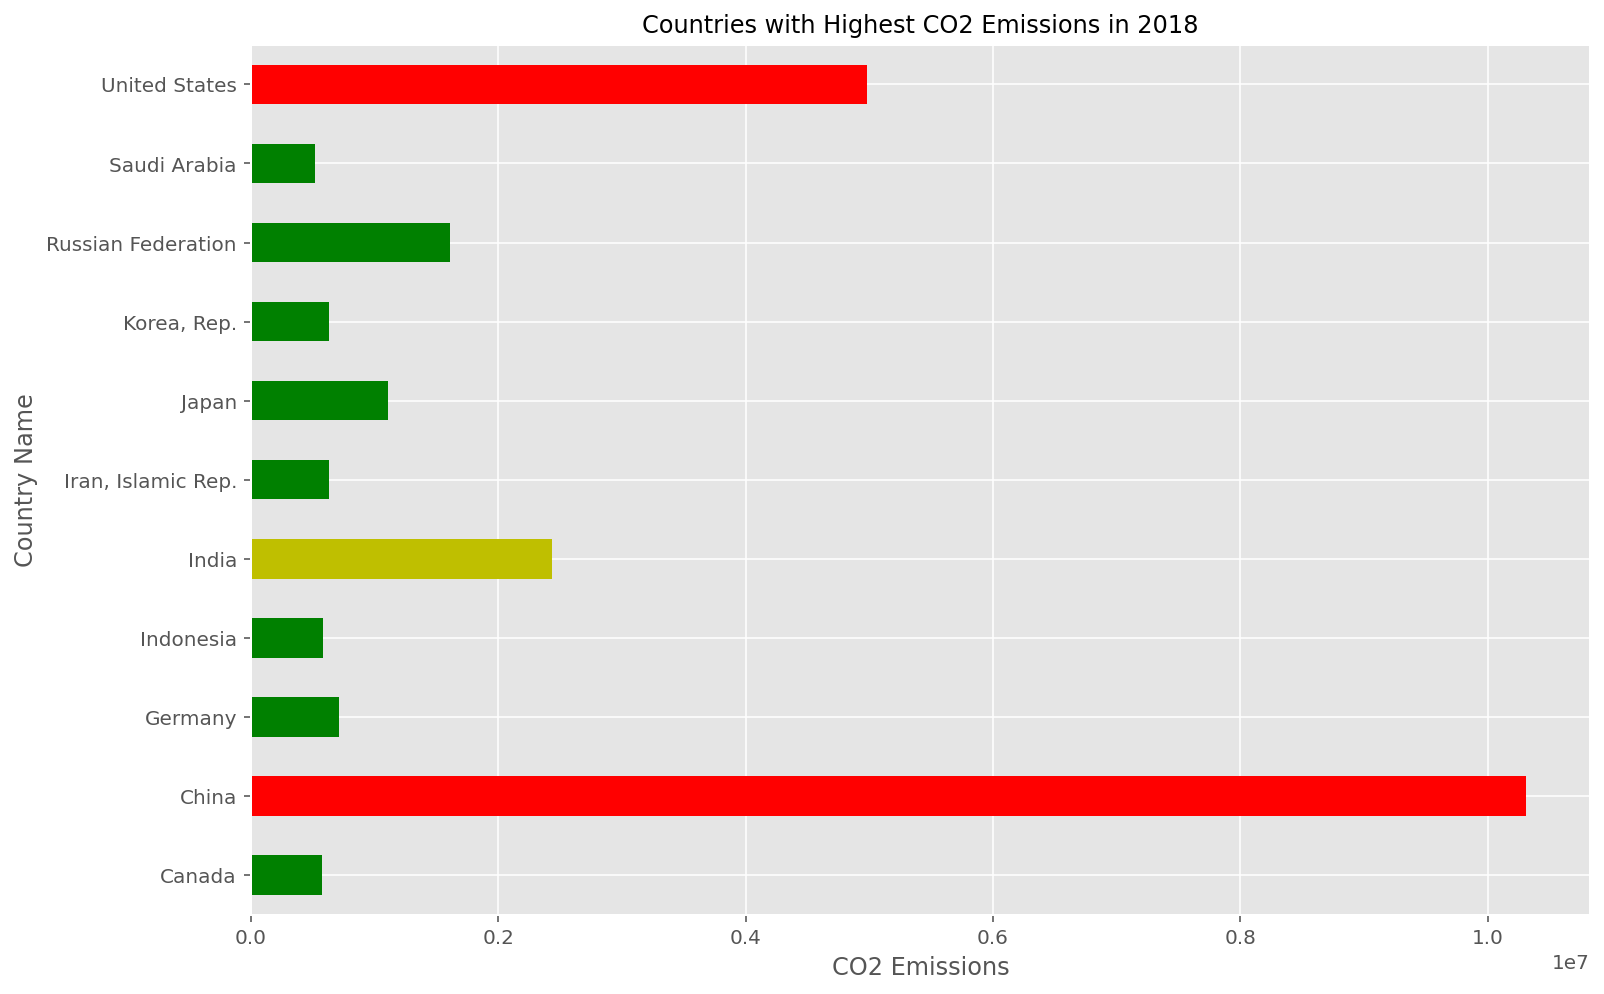

In [ ]:
plt.style.use('ggplot')

bars = em2.plot.barh(x='country', y='CO2 Emissions', figsize=(12, 8), color=['green', 'red', 'green', 'green', 'y', 'green', 'green', 'green', 'green', 'green','red'], legend = False)



plt.title("Countries with Highest CO2 Emissions in 2018",size=12)
plt.xlabel("CO2 Emissions",size=12)
plt.ylabel("Country Name",size=12)




In [ ]:
drop1 = em_data[(em_data['country'] != 'Arab World' ) & (em_data['country'] != 'Central Europe and the Baltics')]
drop2 = drop1[(drop1['country'] != 'South Asia' ) & (drop1['country'] != 'Upper middle income')]
drop3 = drop2[drop2['country'] != 'Euro area']
drop3

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
8552,China,1992,1611125.82,604.693683,1.310000e+08,75.431984,366.460692,17.584684,3.516610e+06,28.200,1.115600e+10,751660.0,2.075744,2418180.0
8567,Germany,1992,113108.00,6445.874000,2.338000e+09,85.952849,26438.230389,3.697964,1.055380e+06,73.360,-2.137728e+09,119240.0,11.072923,892750.0
8593,United Kingdom,1992,28132.00,5452.393333,9.740000e+08,89.212745,20487.170785,2.005662,7.372900e+05,78.172,2.301121e+10,130760.0,9.603615,552980.0
8621,India,1992,646686.00,304.431831,8.800000e+07,56.070282,316.953927,20.752652,1.298280e+06,25.984,2.765124e+08,533310.0,0.693121,630260.0
8631,Japan,1992,249352.00,7023.532248,1.162700e+10,83.954020,31414.984637,10.162888,1.210480e+06,77.610,2.755604e+09,37070.0,8.981073,1117470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15547,Japan,2018,249350.00,NaN,NaN,NaN,39808.168561,NaN,1.204370e+06,91.616,2.528937e+10,21110.0,8.742258,1106150.0
15554,"Korea, Rep.",2018,63070.00,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15630,Russian Federation,2018,8153116.00,NaN,NaN,NaN,11287.355278,NaN,2.419470e+06,74.433,8.784850e+09,849570.0,11.126618,1607550.0
15633,Saudi Arabia,2018,9770.00,NaN,NaN,NaN,23337.017549,NaN,7.152300e+05,83.844,4.247107e+09,44170.0,15.268781,514600.0


In [ ]:
em_percap = country_data[country_data['CO2 Emissions Per Capita'] >= 10]
em_percap_2018 = em_percap[em_percap['year'] == 2018]
em_percap_2018

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15436,United Arab Emirates,2018,3173.000,NaN,NaN,NaN,43839.324487,NaN,2.293800e+05,86.522,1.038529e+10,52960.0,20.797498,200300.0
15441,Australia,2018,1340051.000,NaN,NaN,NaN,57180.779400,NaN,6.173900e+05,86.012,6.132462e+10,139070.0,15.475516,386620.0
15450,Bahrain,2018,6.600,NaN,NaN,NaN,24085.955988,NaN,5.116000e+04,89.287,1.111702e+08,14850.0,19.592976,30750.0
15459,Brunei Darussalam,2018,3800.000,NaN,NaN,NaN,31628.476257,NaN,9.810000e+03,77.629,5.162026e+08,8830.0,16.644909,7140.0
15463,Canada,2018,3470020.700,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15499,Estonia,2018,24384.000,NaN,NaN,NaN,23063.563818,NaN,1.803000e+04,68.880,1.232539e+09,1050.0,12.103085,16000.0
15548,Kazakhstan,2018,33962.012,NaN,NaN,NaN,9812.626371,NaN,2.785400e+05,57.428,8.340907e+07,41360.0,12.061969,220450.0
15554,"Korea, Rep.",2018,63070.000,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15555,Kuwait,2018,62.500,NaN,NaN,NaN,33399.060437,NaN,1.338400e+05,100.000,-2.137757e+07,6080.0,21.622724,89460.0
15572,Luxembourg,2018,887.000,NaN,NaN,NaN,117254.740353,NaN,1.031000e+04,90.981,-1.675658e+10,540.0,15.330208,9320.0


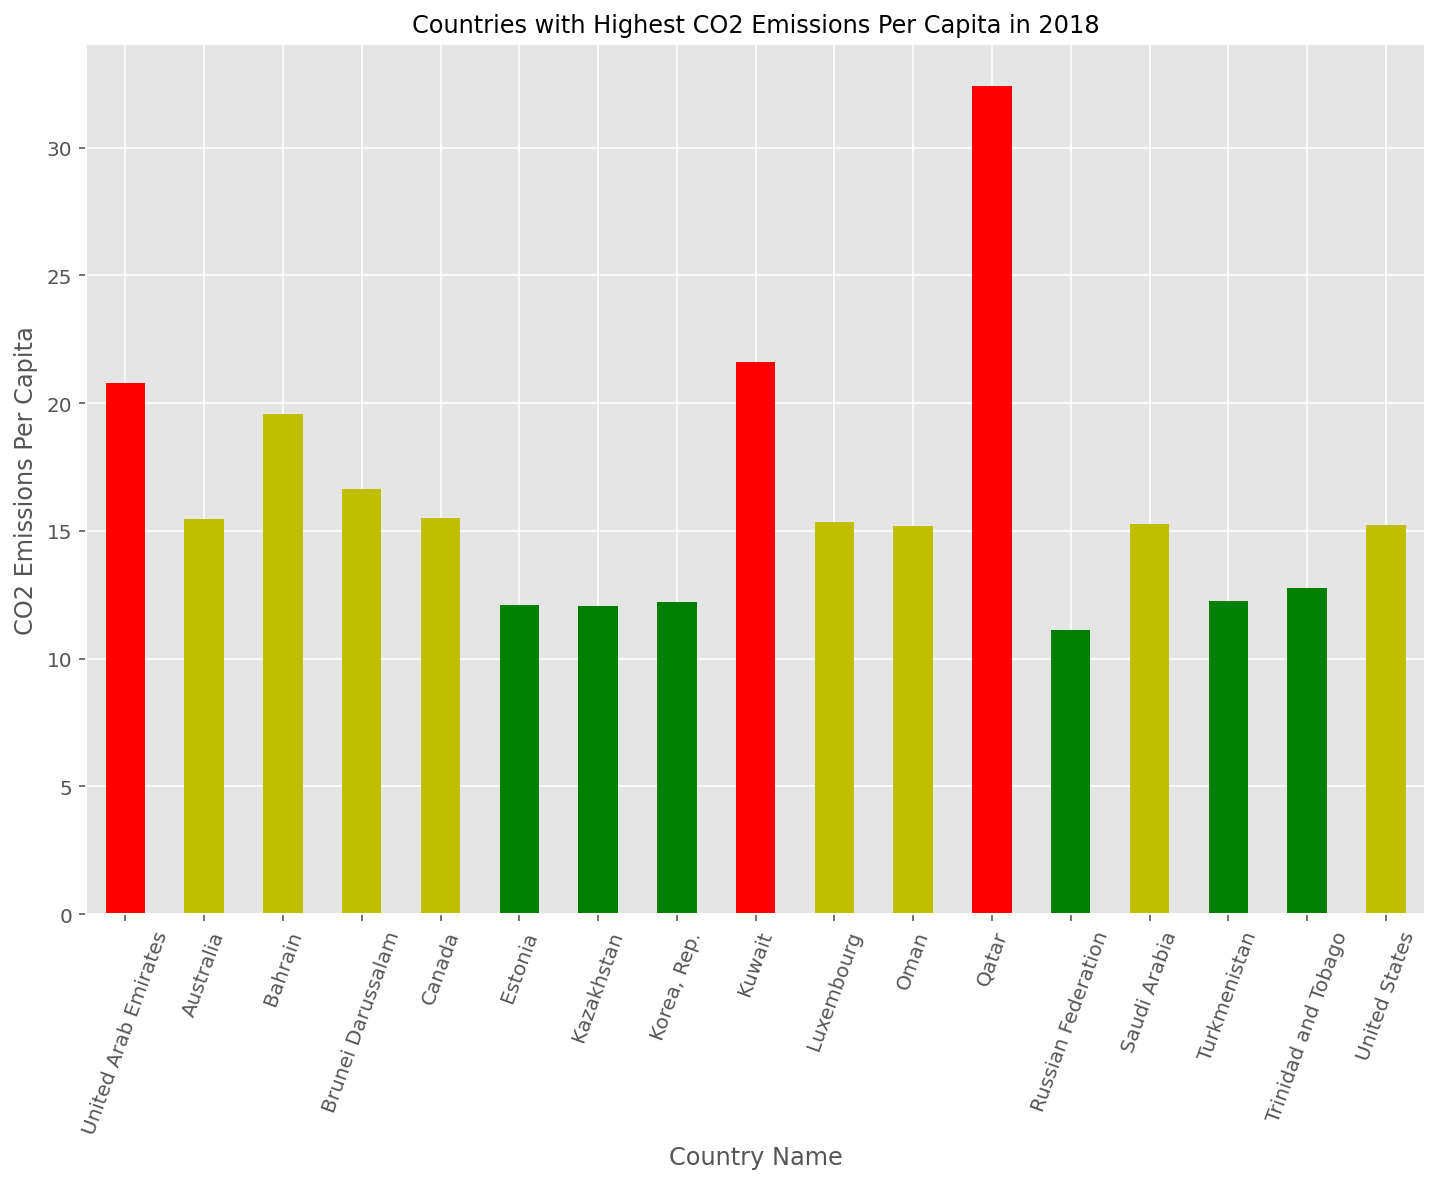

In [ ]:
em_percap_2018.plot.bar(x='country', y='CO2 Emissions Per Capita', rot=70, figsize=(12, 8), color=['red', 'y', 'y', 'y', 'y', 'green', 'green', 'green', 'r', 'y','y', 'red', 'g', 'y', 'green', 'green','y'],legend = False)
plt.title("Countries with Highest CO2 Emissions Per Capita in 2018",size=12)
plt.xlabel("Country Name",size=12)
plt.ylabel("CO2 Emissions Per Capita",size=12)
plt.show()

In [ ]:
em2

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15463,Canada,2018,3470020.7,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15468,China,2018,2162190.4,NaN,NaN,NaN,9905.342004,NaN,1.247109e+07,59.152,2.353651e+11,1238630.0,7.352263,10313460.0
15483,Germany,2018,114190.0,NaN,NaN,NaN,47973.607624,NaN,8.009600e+05,77.312,1.585153e+11,53370.0,8.558390,709540.0
15534,Indonesia,2018,933442.7,1064.0,NaN,NaN,3893.859578,17.037001,9.580800e+05,55.325,1.890983e+10,287500.0,2.178462,583110.0
15537,India,2018,716272.0,NaN,NaN,NaN,1996.915087,NaN,3.388910e+06,34.030,4.211745e+10,666510.0,1.799825,2434520.0
15540,"Iran, Islamic Rep.",2018,107270.3,NaN,NaN,NaN,3598.483454,NaN,9.255200e+05,74.898,2.373000e+09,149690.0,7.693013,629290.0
15547,Japan,2018,249350.0,NaN,NaN,NaN,39808.168561,NaN,1.204370e+06,91.616,2.528937e+10,21110.0,8.742258,1106150.0
15554,"Korea, Rep.",2018,63070.0,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15630,Russian Federation,2018,8153116.0,NaN,NaN,NaN,11287.355278,NaN,2.419470e+06,74.433,8.784850e+09,849570.0,11.126618,1607550.0
15633,Saudi Arabia,2018,9770.0,NaN,NaN,NaN,23337.017549,NaN,7.152300e+05,83.844,4.247107e+09,44170.0,15.268781,514600.0


In [ ]:
a = em2[(em2['country'] != 'China' ) & (em2['country'] != 'Germany')]
b = a[(a['country'] != 'Indonesia' ) & (a['country'] != 'India')]
co2_emision = b[(b['country'] != 'Iran, Islamic Rep.' ) & (b['country'] != 'Japan')]
co2_emision

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15463,Canada,2018,3470020.7,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15554,"Korea, Rep.",2018,63070.0,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15630,Russian Federation,2018,8153116.0,NaN,NaN,NaN,11287.355278,NaN,2.419470e+06,74.433,8.784850e+09,849570.0,11.126618,1607550.0
15633,Saudi Arabia,2018,9770.0,NaN,NaN,NaN,23337.017549,NaN,7.152300e+05,83.844,4.247107e+09,44170.0,15.268781,514600.0
15679,United States,2018,3097950.0,NaN,NaN,NaN,63064.418410,NaN,6.121630e+06,82.256,2.143150e+11,622590.0,15.240875,4981300.0


In [ ]:

em_percap_2018

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15436,United Arab Emirates,2018,3173.000,NaN,NaN,NaN,43839.324487,NaN,2.293800e+05,86.522,1.038529e+10,52960.0,20.797498,200300.0
15441,Australia,2018,1340051.000,NaN,NaN,NaN,57180.779400,NaN,6.173900e+05,86.012,6.132462e+10,139070.0,15.475516,386620.0
15450,Bahrain,2018,6.600,NaN,NaN,NaN,24085.955988,NaN,5.116000e+04,89.287,1.111702e+08,14850.0,19.592976,30750.0
15459,Brunei Darussalam,2018,3800.000,NaN,NaN,NaN,31628.476257,NaN,9.810000e+03,77.629,5.162026e+08,8830.0,16.644909,7140.0
15463,Canada,2018,3470020.700,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15499,Estonia,2018,24384.000,NaN,NaN,NaN,23063.563818,NaN,1.803000e+04,68.880,1.232539e+09,1050.0,12.103085,16000.0
15548,Kazakhstan,2018,33962.012,NaN,NaN,NaN,9812.626371,NaN,2.785400e+05,57.428,8.340907e+07,41360.0,12.061969,220450.0
15554,"Korea, Rep.",2018,63070.000,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15555,Kuwait,2018,62.500,NaN,NaN,NaN,33399.060437,NaN,1.338400e+05,100.000,-2.137757e+07,6080.0,21.622724,89460.0
15572,Luxembourg,2018,887.000,NaN,NaN,NaN,117254.740353,NaN,1.031000e+04,90.981,-1.675658e+10,540.0,15.330208,9320.0


In [ ]:
aa = em_percap_2018[(em_percap_2018['country'] != 'United Arab Emirates' ) & (em_percap_2018['country'] != 'Australia')]
bb = aa[(aa['country'] != 'Bahrain') & (aa['country'] != 'Brunei Darussalam')]
cc = bb[(bb['country'] != 'Estonia') & (bb['country'] != 'Kazakhstan')]
dd = cc[(cc['country'] != 'Luxembourg') & (cc['country'] != 'Kuwait')]
ee = dd[(dd['country'] != 'Oman') & (dd['country'] != 'Qatar')]
co2_em_percap = ee[(ee['country'] != 'Turkmenistan') & (ee['country'] != 'Trinidad and Tobago')]

co2_em_percap

,country,year,Forest Area,Electric Power Consm,Electric Prod From Ren,Foss Fuel Energy Consm,GDP Per Capita,Renewable Electric Output,Total Greenhouse Gas Emissions,Urban Population,Foreign Direct Investment,Methane Emissions,CO2 Emissions Per Capita,CO2 Emissions
15463,Canada,2018,3470020.7,NaN,NaN,NaN,46548.638411,NaN,7.379900e+05,81.411,4.260376e+10,93980.0,15.497065,574400.0
15554,"Korea, Rep.",2018,63070.0,NaN,NaN,NaN,33436.923065,NaN,7.155000e+05,81.459,1.218260e+10,25530.0,12.229704,630870.0
15630,Russian Federation,2018,8153116.0,NaN,NaN,NaN,11287.355278,NaN,2.419470e+06,74.433,8.784850e+09,849570.0,11.126618,1607550.0
15633,Saudi Arabia,2018,9770.0,NaN,NaN,NaN,23337.017549,NaN,7.152300e+05,83.844,4.247107e+09,44170.0,15.268781,514600.0
15679,United States,2018,3097950.0,NaN,NaN,NaN,63064.418410,NaN,6.121630e+06,82.256,2.143150e+11,622590.0,15.240875,4981300.0


In [ ]:
all_vars_clean2=country_data

#Seaborn plot to investigate the outliers.

In [ ]:
sns.set()

fig,ax=plt.subplots(figsize=(22,24))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=1)

for [col, label] in  [['Electric Power Consm', 'Electric Power Consm'], ['Electric Prod From Ren', 'Electric Prod From Ren'], ['Foss Fuel Energy Consm','Foss Fuel Energy Consm'], ['Renewable Electric Output', 'Renewable Electric Output']]:
      
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="CO2 Emissions Per Capita", data=all_vars_clean2, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel('CO2 Emissions Per Capita', fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, loc='right', fontsize=7)
plt.show()

From the plot it can be noticed that Qatar have unrelated data with respect to other countries. Hence, the country data will be dropped considering outlires.


In [ ]:
# Remove the Qatar outliers
all_vars_clean2 = all_vars_clean2[(all_vars_clean2['country']!='Qatar')]
print("Shape of the dataset after removing the Qatar outliers:")
all_vars_clean2.shape

In [ ]:
sns.set()

fig,ax=plt.subplots(figsize=(22,24))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=1)

for [col, label] in  [['Electric Power Consm', 'Electric Power Consm'], ['Electric Prod From Ren', 'Electric Prod From Ren'], ['Foss Fuel Energy Consm','Foss Fuel Energy Consm'], ['Renewable Electric Output', 'Renewable Electric Output']]:
      
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="CO2 Emissions Per Capita", data=all_vars_clean2, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel('CO2 Emissions Per Capita', fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=1, loc='right', fontsize=7)
plt.show()

In [ ]:
all_vars_clean2.isnull().sum()

In [ ]:
# Store copy of filtered data in another variable
data_encoded = all_vars_clean2.copy()
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'CountryCode'. 
data_encoded['country']= label_encoder.fit_transform(data_encoded['country']) 
data_encoded

In [ ]:
# Reset index aftter label encoding
data_encoded= data_encoded.reset_index(drop=True)
data_encoded

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imp.fit_transform(data_encoded))
data_imputed.columns = data_encoded.columns
data_imputed.index = data_encoded.index

In [ ]:
# View missing values after imputation
df = data_imputed
df.isnull().sum()

In [ ]:
df

In [ ]:
print("Remaining missing values per column:")
print("Final shape of the cleaned dataset:")
print(df.shape)

In [ ]:
#pip install --upgrade xlrd


In [ ]:
from google.colab import files

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
files.download('cleaned_data.csv')